Jared Crebo 30085839

PHYS 381: Assignment 2

The Pendulum problem

4 (Exercise) Python script to solve the linear pendulum equation

This script models the swing of a pendulum via the linear pendulum equation, which is solved numerically through the trapezoid rule equations. 

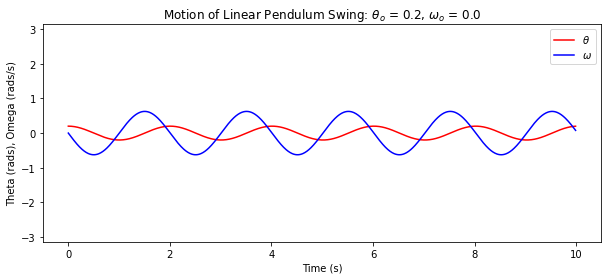

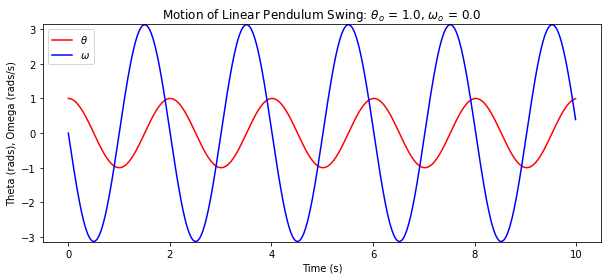

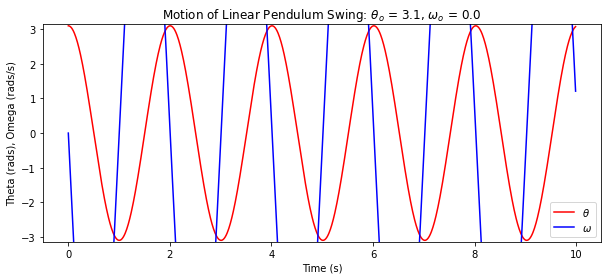

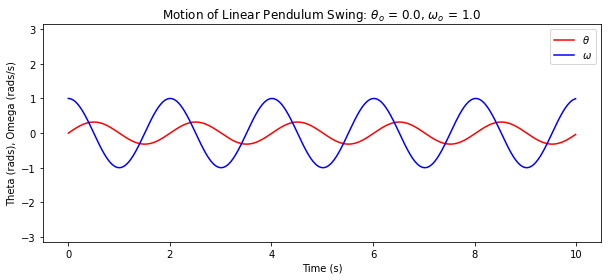

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import math

g  = 9.81 # Acceleration of gravity (m/s^2)
L = 1 # Length of pendulum (m)
k = 0.0 # Stiffness coefficient (N/rad)
A = 0.0 # driving force amplitude (N)
phi = 0.66667 # driving force frequency (rad/s)

# No driving force or damping sin(x) = x
def f(theta, omega, t):
    '''
    Equation of motion of a linear pendulum
    t - current time in seconds
    theta - current angle in rads
    omega - current angular velocity in rads/sec
    Function returns the angular acceleration of the current timestep
    '''
    return -g/L * theta - k*omega + A*math.cos(phi * t)

def plot_linear_pendulum(theta1, omega1):
    '''
    Main solver function
    theta1 - initial angle in rads
    omega1 - intial angular velocity in rads/sec
    Function takes the initial conditions and returns a plot of the angle and angular velocity of the pendulum wrt time
    '''

    # Initialize arrays to store angle, angular velocity, and time for plotting
    theta = np.zeros(1000)
    omega = np.zeros(1000)
    t = np.zeros(1000)

    # Initialize first index of array to the initial conditions
    theta[0] = theta1
    omega[0] = omega1
    t[0] = 0.0
    # Set the timestep value (s)
    dt = 0.01

    for i in range(0,999,1):
        # For each current timestep, calculate the next angle and angular velocity of the pendulum based on data from the current timestep
        # Trapezoid Method
        theta[i+1] = theta[i] + dt/2*omega[i] + dt/2*(omega[i] + dt*f(theta[i], omega[i], t[1]))
        omega[i+1] = omega[i] + dt/2*f(theta[i], omega[i], t[i]) + dt/2*f(theta[i+1], omega[i]+dt*f(theta[i],omega[i],t[i]), t[i+1])
        t[i+1] = t[i] + dt

    # Initialize figure for plotting
    fig, ax = plt.subplots(figsize=[10,4])
    ax.plot(t,theta,color='red',label='$\\theta $') # plot angle vs time
    ax.plot(t,omega,color='blue',label='$\omega $') # plot angular velocity vs time
    ax.set_xlabel("Time (s)") 
    ax.set_ylabel("Theta (rads), Omega (rads/s)")
    ax.set_title("Motion of Linear Pendulum Swing: $\\theta_o$ = " + str(theta1) + ", $\omega_o$ = " + str(omega1))
    ax.set_ylim((-math.pi, math.pi))
    ax.legend()

# Plot the motion of a linear pendulum with the initial conditions (theta, omega)
plot_linear_pendulum(0.2, 0.0)
plot_linear_pendulum(1.0, 0.0)
plot_linear_pendulum(3.1, 0.0)
plot_linear_pendulum(0.0, 1.0)